In [ ]:
# Supplemental notebook for research purposes only

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sb
import tweepy
import numpy as np

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import access_token, consumer_key, consumer_secret, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
# Create a Python script to perform a sentiment analysis of the Twitter activity of Good News Network
gnn_target_user = "@goodnewsnetwork"

# Counter
counter = 1

# Variables for holding sentiments
gnn_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(2):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(gnn_target_user, page= x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        gnn_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


Tweet 1: What It’s Like For a Woman With Depression to Build an Upbeat Multi-Million Dollar Company
https://t.co/jLqLXR7cMk @jengotch
Tweet 2: Keep an Eye on the Skies: Chinese Spacecraft Will Create Ethereal Light Show
https://t.co/9DveN1Czzr
Tweet 3: Vulnerable Turtles Return Home to Shore After World’s Largest Volunteer-Led Beach Cleanup
https://t.co/YLla9aM37a
Tweet 4: World’s Second Largest Fast Food Chain Begins Phase-Out of Plastic Straws
https://t.co/F1I2nUhBKt
Tweet 5: When Sick Calf is Rejected By His Herd, He Becomes a Dog Instead
https://t.co/mb49sVJlBQ
Tweet 6: Watch Stand-in Goalie Who Has Never Played Pro Steal the Show With Perfect Winning Streak
https://t.co/jAwD9q5zLm
Tweet 7: Woman’s Life is Saved After She Posts Newspaper Ad For “Generous O Blood Type”
https://t.co/4niuuio7Q1
Tweet 8: Taco Bell is Committing to Making Sure That All of Their Employees Can Go Through College
https://t.co/R8W23i0P11
Tweet 9: Sun Shield Thinner Than Human Hair Could Protect Great Barrie

In [6]:
# Convert sentiments to DataFrame
gnn_sentiments_df = pd.DataFrame(gnn_sentiments)
gnn_sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.2732,Fri Mar 30 19:07:29 +0000 2018,0.861,0.000,0.139,1
1,-0.2263,Fri Mar 30 18:22:01 +0000 2018,0.863,0.137,0.000,2
2,0.0000,Fri Mar 30 17:34:04 +0000 2018,1.000,0.000,0.000,3
3,-0.7650,Fri Mar 30 16:41:42 +0000 2018,0.625,0.375,0.000,4
4,0.7430,Fri Mar 30 15:38:35 +0000 2018,0.486,0.130,0.385,5


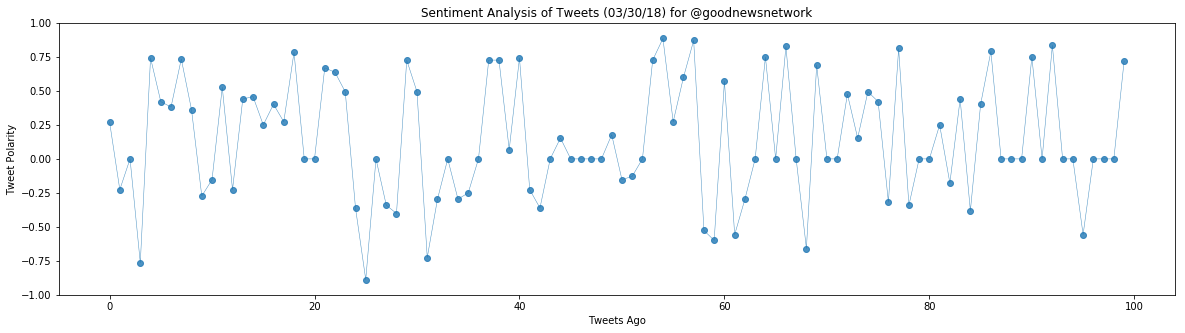

In [10]:
# Set parameters and create GNN plot

plt.figure(figsize=(20,5))
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), gnn_target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.plot(np.arange(len(gnn_sentiments_df["Compound"])),
         gnn_sentiments_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# Display graph
plt.show()